# In-class work 2: Dimensionality reduction techniques

This notebook gives you a starting point for exploring several dimensionality-reduction techniques. 

**Important:** Make sure this notebook is pointing toward your custom `conda` kernel (top right drop-down menu).

<a name='section_0'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">0. Imports & installs</h2>

In [1]:
%matplotlib inline

Here's a full cell of basic imports:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### set plot resolution
%config InlineBackend.figure_format = 'retina'

### set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<a name='section_1'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">1. Load the MNIST dataset</h2>

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
### Load the MNIST data (X has the pixel values for each 28x28 image; y has the digit class labels)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int) ### convert class labels from strings to ints
print(X.shape)
print(y.shape)

classes = np.unique(y)
print(f"Classes: {classes}")

(70000, 784)
(70000,)
Classes: [0 1 2 3 4 5 6 7 8 9]


In [5]:
### Optionally: reduce the number of events to 1000 for speed purposes
n_events = 1_000
X = X[:n_events]
y = y[:n_events]

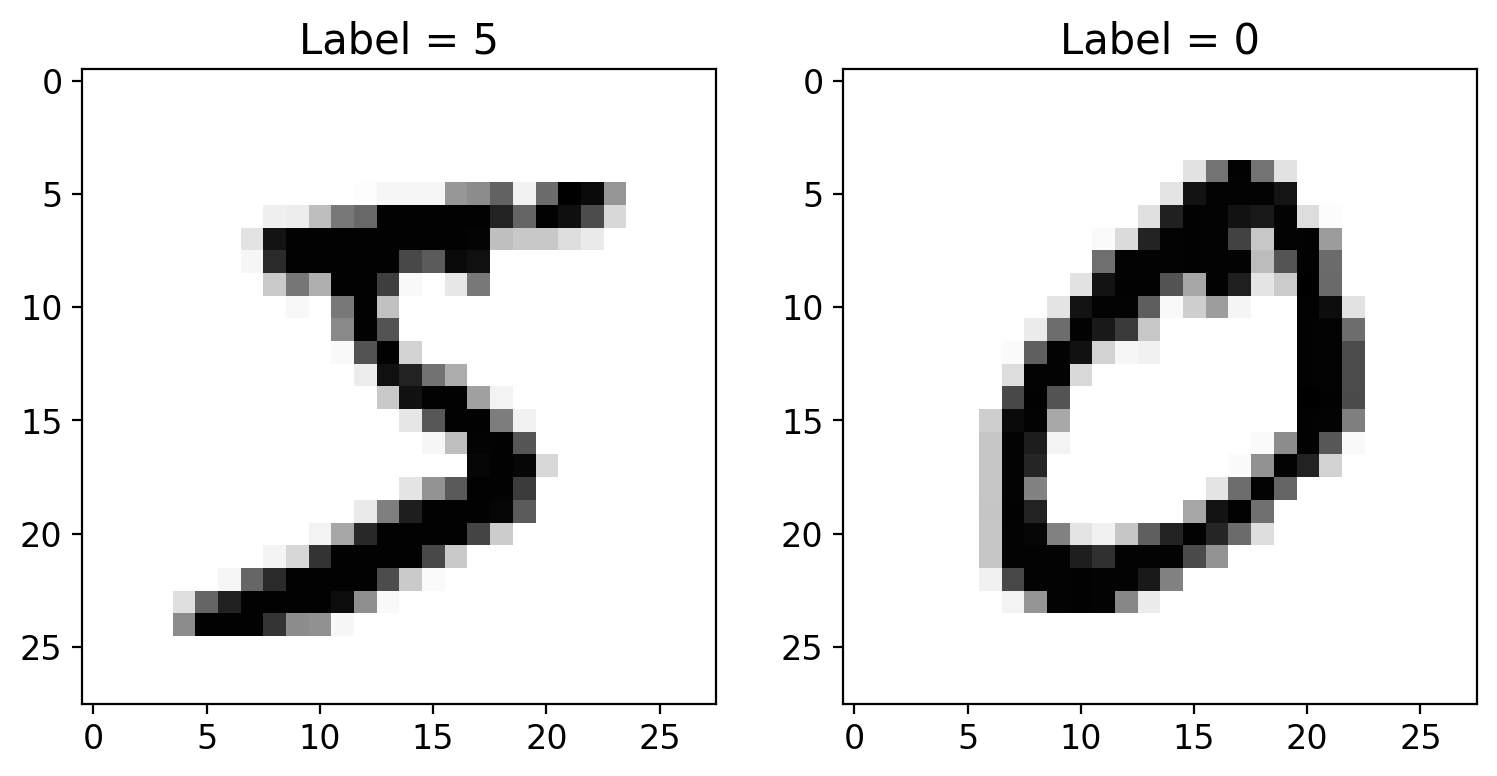

In [6]:
### Visualize the first 2 images
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[0,:].reshape(28,28), 'Greys')
ax[1].imshow(X[1,:].reshape(28,28), 'Greys')
ax[0].set_title(f"Label = {y[0]}")
ax[1].set_title(f"Label = {y[1]}");

<a name='section_2'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">2. PCA</h2>

In [7]:
### find out how to import PCA from scikit-learn
from sklearn.decomposition import PCA

In [8]:
### Specify 2 components for a 2D plot
n_components = 40
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X)

In [9]:
### make a dataframe out of these results 
df_pca = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})
df_pca

,pca_1,pca_2,label
0,203.116757,337.562896,5
1,1105.173779,425.701013,0
2,10.385167,-417.409648,4
3,-1012.902748,653.160911,1
4,-335.813122,-662.653574,9
...,...,...,...
995,274.193612,-663.319425,7
996,-41.405374,-57.499750,6
997,767.802215,193.626527,0
998,148.165801,621.107252,3


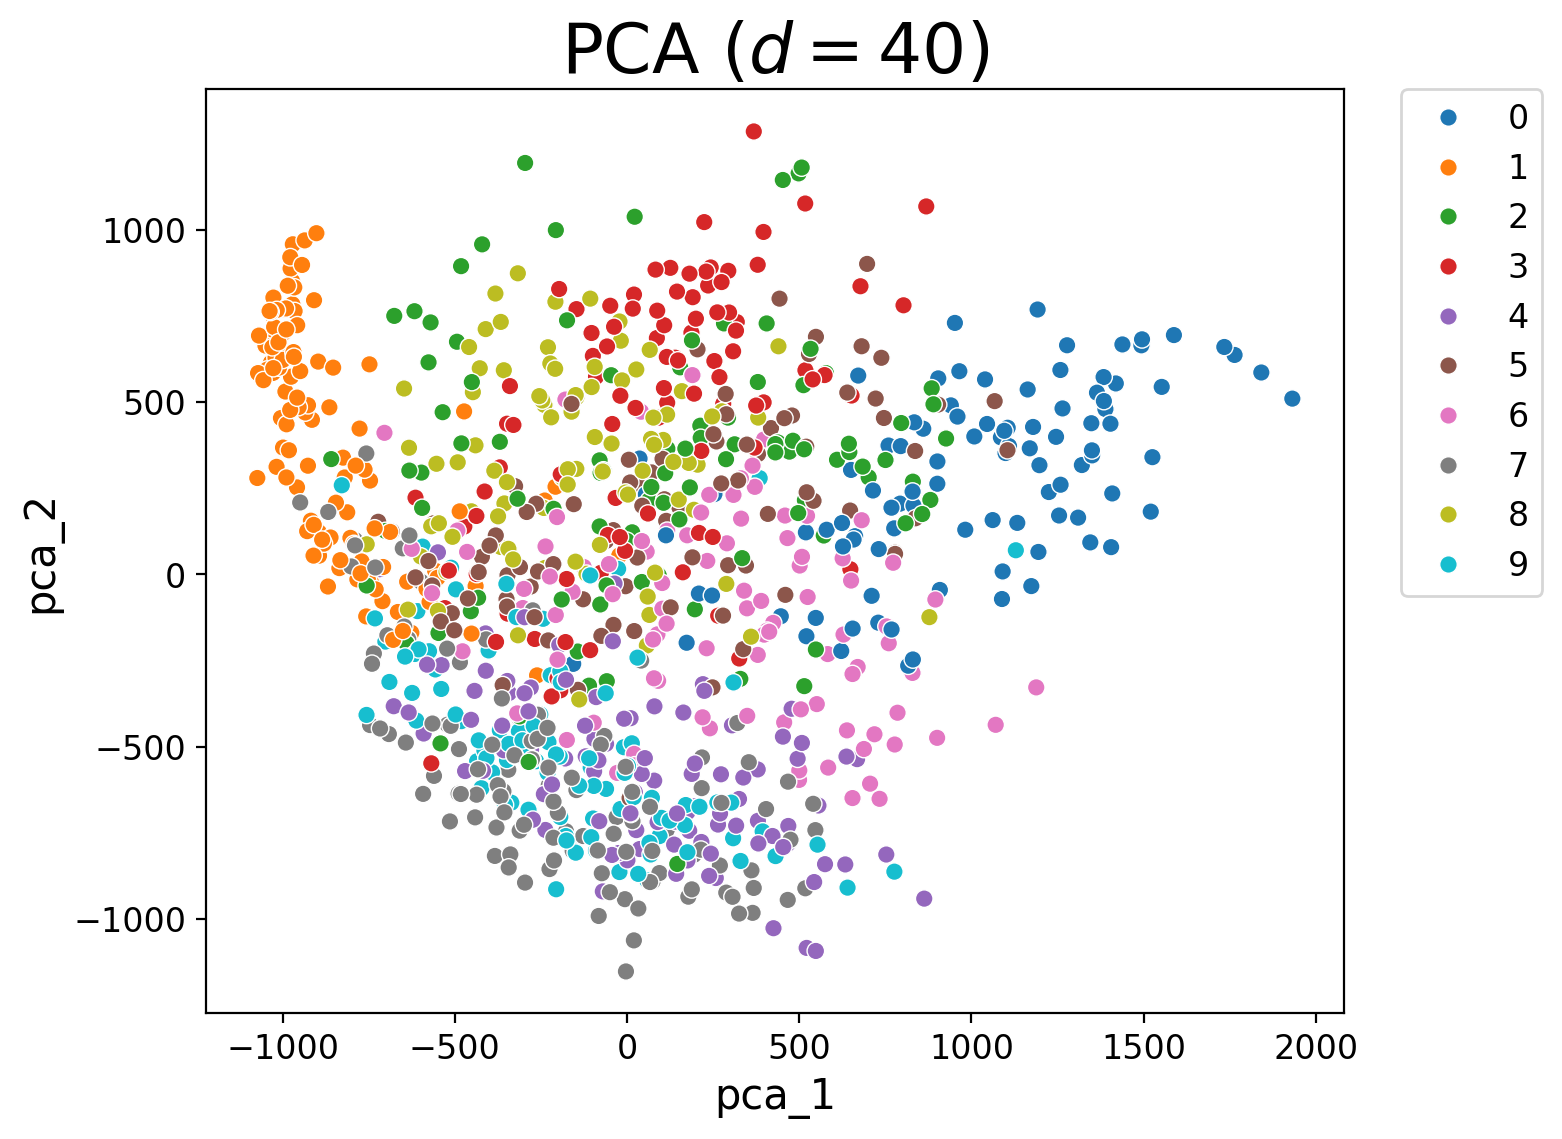

In [10]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=df_pca, ax=ax, palette='tab10', legend='full', s=40)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);
ax.set_title(f"PCA ($d={n_components}$)", fontsize=25);

How does the class separation look? Try varying the number of components and see how this changes.

<a name='section_3'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">3. t-SNE</h2>

Now import t-SNE using scikit-learn:

In [11]:
from sklearn.manifold import TSNE 

In [12]:
n_components = 2
perplexity = 40
tsne = TSNE(n_components=n_components, perplexity=perplexity)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

(1000, 2)

In [13]:
### make a dataframe out of these results 
df_tsne = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
df_tsne

,tsne_1,tsne_2,label
0,11.848469,9.814392,5
1,24.502890,20.957754,0
2,-2.280797,-23.939262,4
3,-21.636393,4.428126,1
4,-9.010476,-18.935534,9
...,...,...,...
995,-17.370825,-28.811716,7
996,20.186819,0.447642,6
997,18.626284,23.814484,0
998,12.386866,4.987902,3


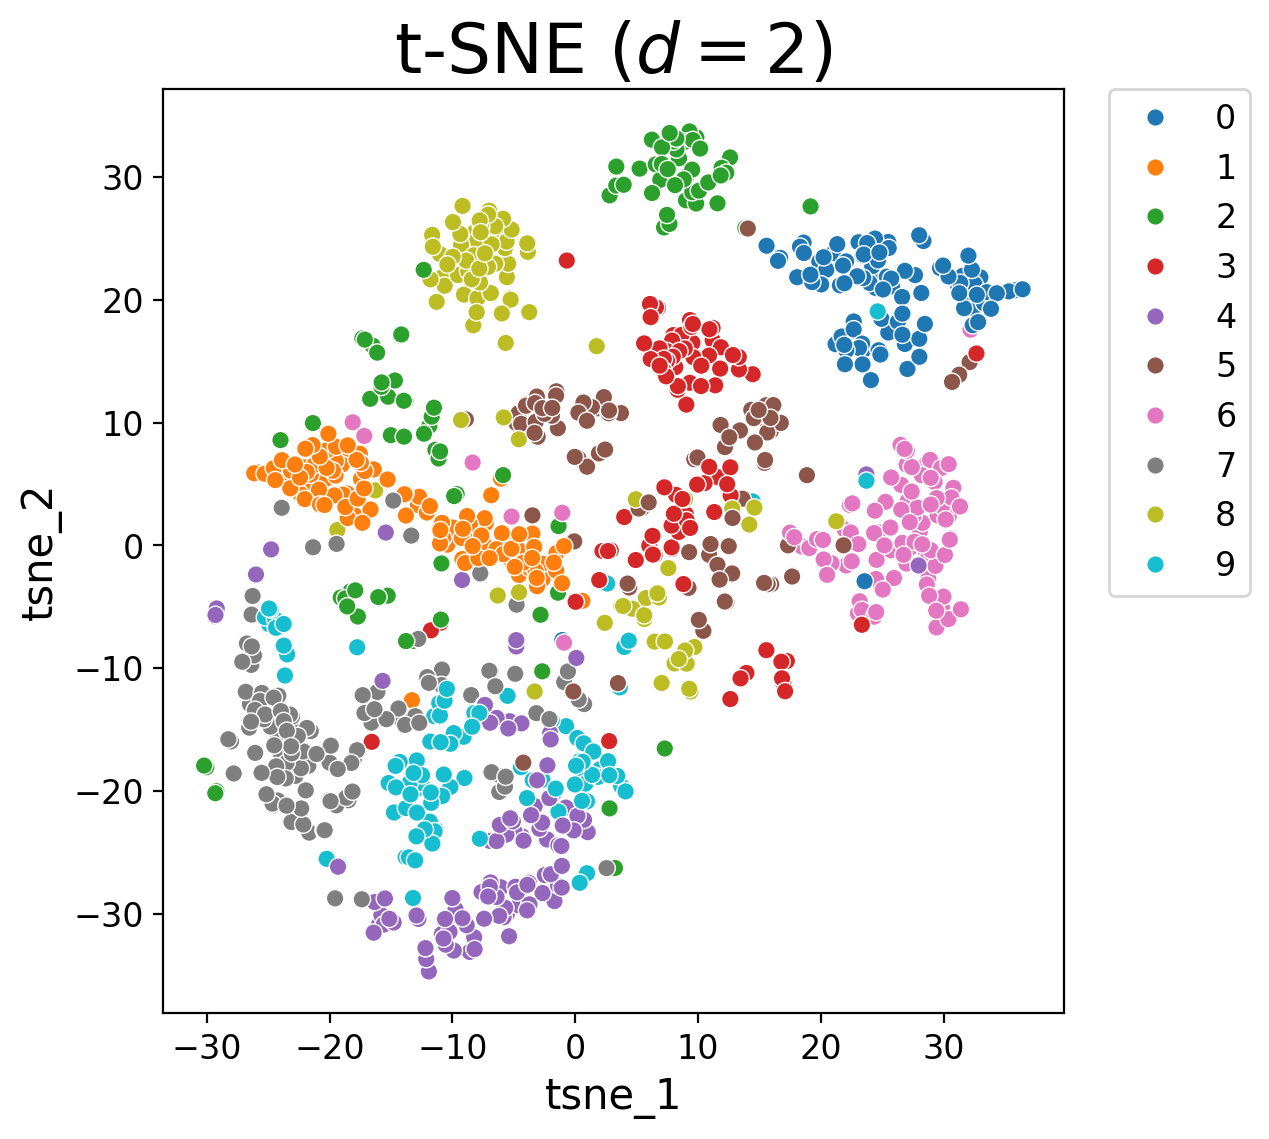

In [14]:
### make a scatterplot of the 2 t-SNE components 
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=df_tsne, ax=ax, palette='tab10', legend='full', s=40)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);
ax.set_title(f"t-SNE ($d={n_components}$)", fontsize=25);

Has the class separation improved? 

Try visualizing a few images to diagnose why some examples of images from a certain label are clustered together vs. placed closer to another category.

Try varying the "perplexity" parameter to understand its influence on clustering. (What is perplexity? See the FAQ here: https://lvdmaaten.github.io/tsne/). See the code below for an example of how to vary the perplexity -- make an equivalent version of this plot using your MNIST data.

circles, perplexity=5 in 0.58 sec
circles, perplexity=30 in 0.56 sec
circles, perplexity=50 in 0.59 sec
circles, perplexity=100 in 0.48 sec
S-curve, perplexity=5 in 0.43 sec
S-curve, perplexity=30 in 0.49 sec
S-curve, perplexity=50 in 0.57 sec
S-curve, perplexity=100 in 0.6 sec
uniform grid, perplexity=5 in 0.5 sec
uniform grid, perplexity=30 in 0.61 sec
uniform grid, perplexity=50 in 0.49 sec
uniform grid, perplexity=100 in 0.55 sec


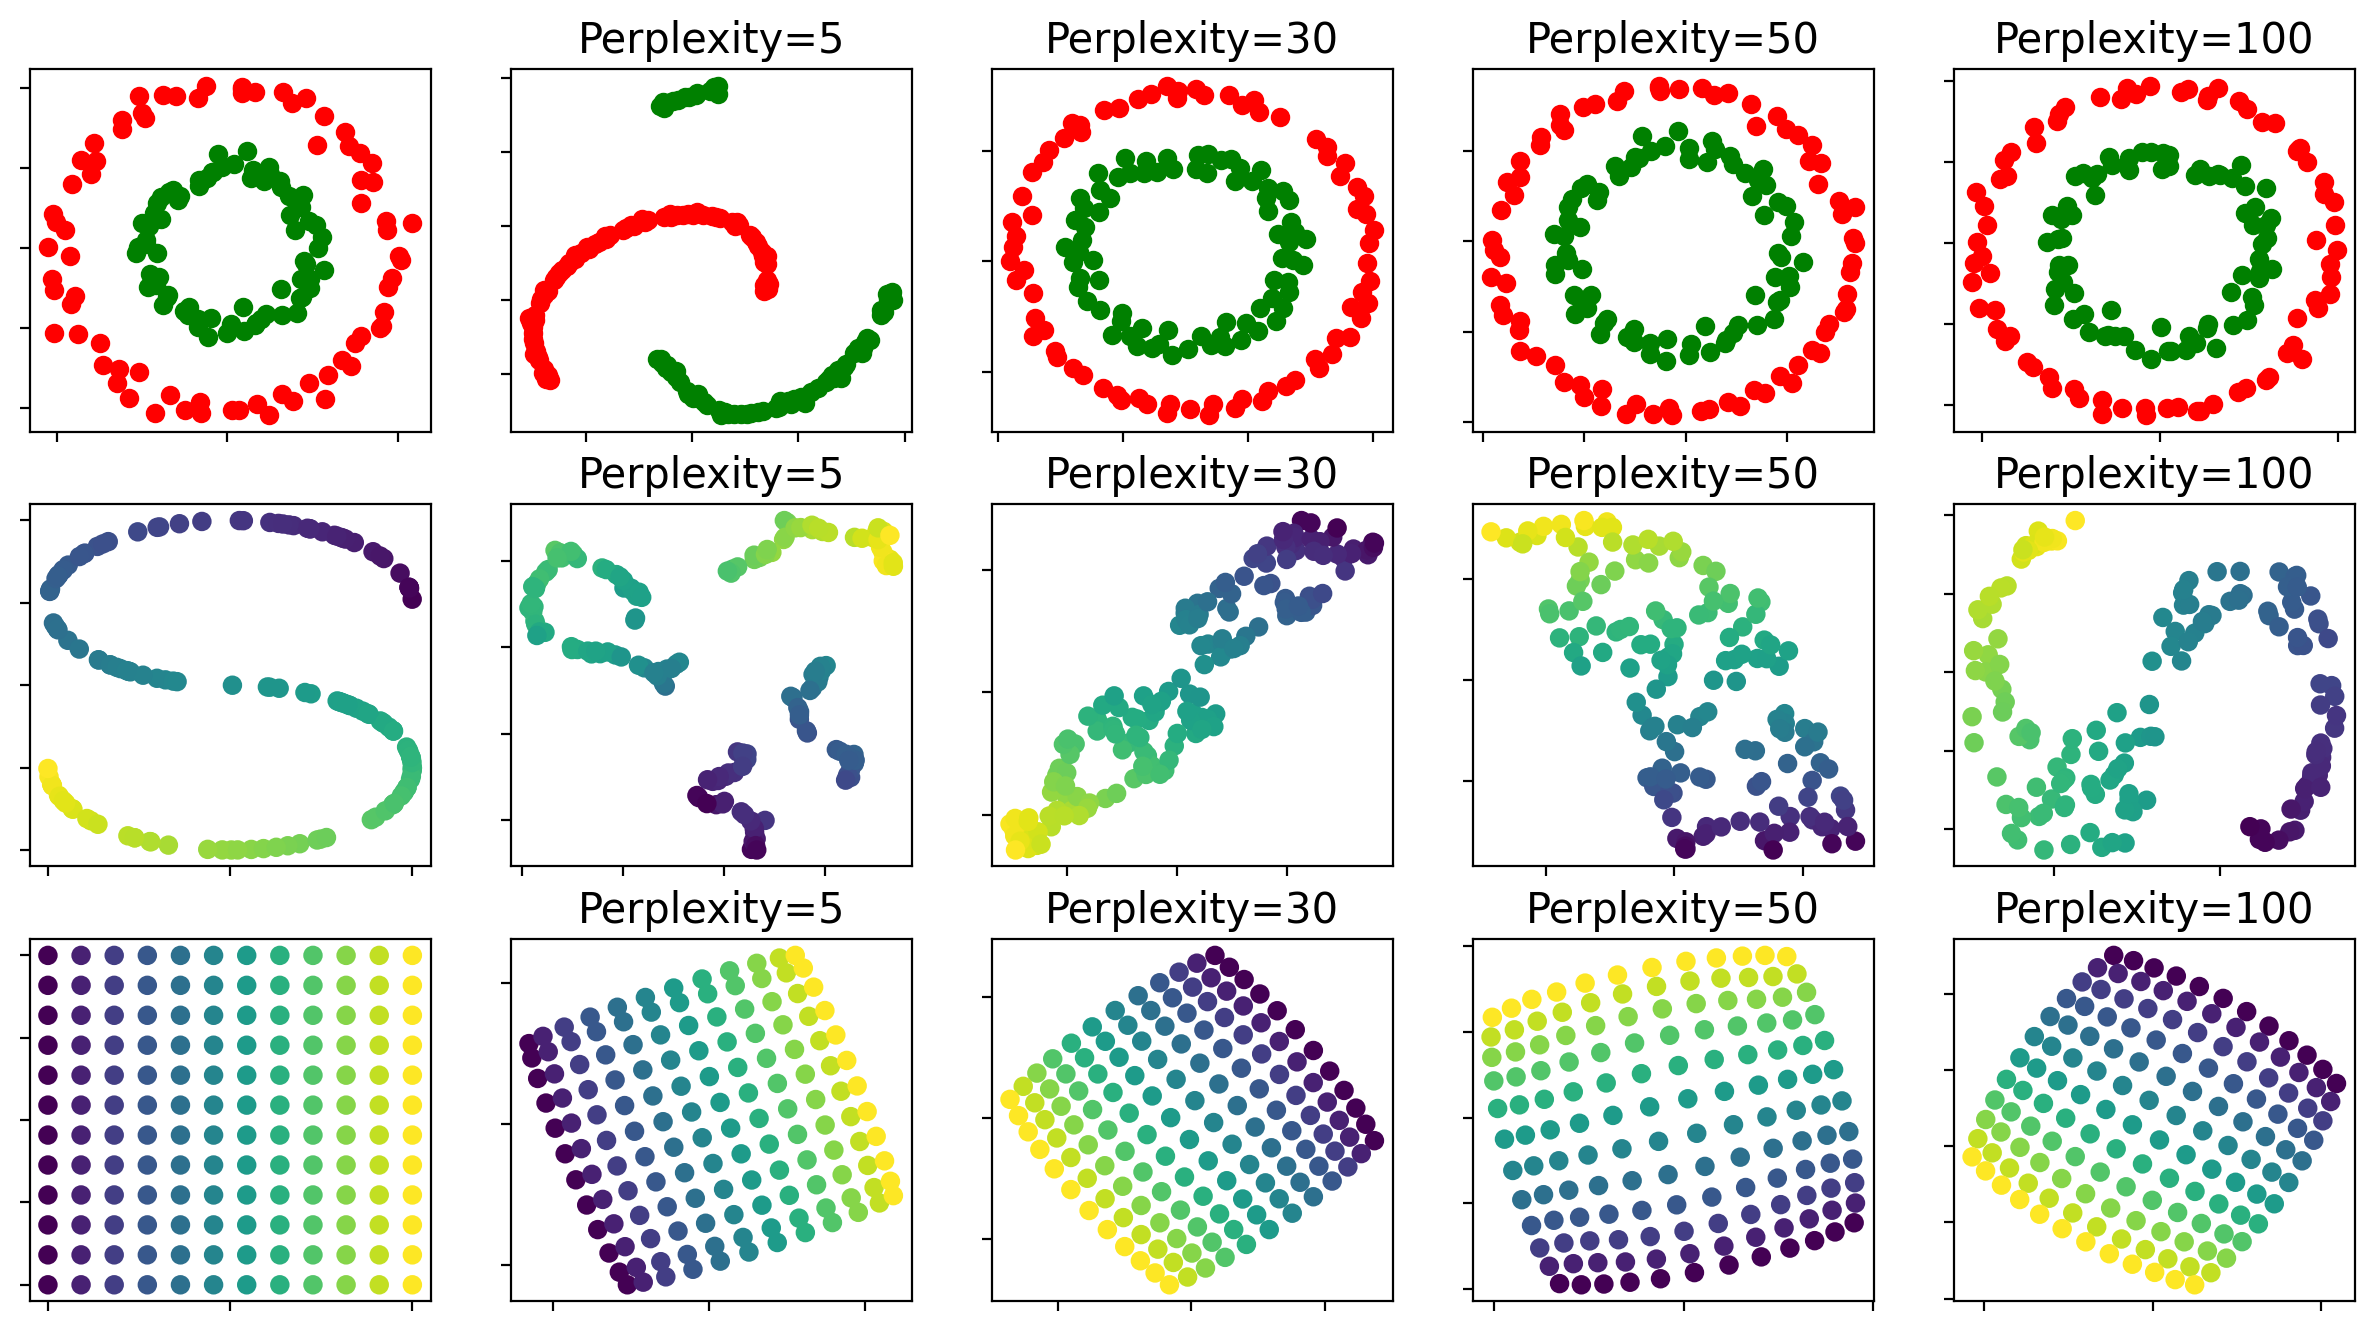

In [15]:
def plot_perplexity(): 
    # Authors: The scikit-learn developers
    # SPDX-License-Identifier: BSD-3-Clause
    
    from time import time
    
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.ticker import NullFormatter
    
    from sklearn import datasets, manifold
    
    n_samples = 150
    n_components = 2
    (fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
    perplexities = [5, 30, 50, 100]
    
    X, y = datasets.make_circles(
        n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
    )
    
    red = y == 0
    green = y == 1
    
    ax = subplots[0][0]
    ax.scatter(X[red, 0], X[red, 1], c="r")
    ax.scatter(X[green, 0], X[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")
    
    for i, perplexity in enumerate(perplexities):
        ax = subplots[0][i + 1]
    
        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            # max_iter=300,
        )
        Y = tsne.fit_transform(X)
        t1 = time()
        print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[red, 0], Y[red, 1], c="r")
        ax.scatter(Y[green, 0], Y[green, 1], c="g")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis("tight")
    
    # Another example using s-curve
    X, color = datasets.make_s_curve(n_samples, random_state=0)
    
    ax = subplots[1][0]
    ax.scatter(X[:, 0], X[:, 2], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    for i, perplexity in enumerate(perplexities):
        ax = subplots[1][i + 1]
    
        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            learning_rate="auto",
            # max_iter=300,
        )
        Y = tsne.fit_transform(X)
        t1 = time()
        print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[:, 0], Y[:, 1], c=color)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis("tight")
    
    
    # Another example using a 2D uniform grid
    x = np.linspace(0, 1, int(np.sqrt(n_samples)))
    xx, yy = np.meshgrid(x, x)
    X = np.hstack(
        [
            xx.ravel().reshape(-1, 1),
            yy.ravel().reshape(-1, 1),
        ]
    )
    color = xx.ravel()
    ax = subplots[2][0]
    ax.scatter(X[:, 0], X[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    for i, perplexity in enumerate(perplexities):
        ax = subplots[2][i + 1]
    
        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            # max_iter=400,
        )
        Y = tsne.fit_transform(X)
        t1 = time()
        print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[:, 0], Y[:, 1], c=color)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis("tight")
    
    plt.show()

plot_perplexity()

<a name='section_4'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">4. UMAP</h2>

In [16]:
%pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import umap.umap_ as umap

In [18]:
n_components = 2

umap_model = umap.UMAP(
    n_components=n_components,
    n_neighbors=15,   ### local structure (5–50 is common)
    min_dist=0.1,     ### cluster tightness (0.0–0.5)
    metric="euclidean",
    random_state=0,
    verbose=True
)
umap_result = umap_model.fit_transform(X)

/home/amand/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=0, verbose=True)
Wed Sep 24 17:08:12 2025 Construct fuzzy simplicial set
Wed Sep 24 17:08:13 2025 Finding Nearest Neighbors
Wed Sep 24 17:08:21 2025 Finished Nearest Neighbor Search
Wed Sep 24 17:08:25 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Sep 24 17:08:34 2025 Finished embedding


In [19]:
umap_result[:,0].shape

(1000,)

In [20]:
### make a dataframe out of these results 
df_umap = pd.DataFrame({'umap_1': umap_result[:,0], 'umap_2': umap_result[:,1], 'label': y})
df_umap

,umap_1,umap_2,label
0,15.919608,13.229162,5
1,12.693819,11.389614,0
2,17.755526,8.349586,4
3,20.326172,12.526750,1
4,18.326324,9.497480,9
...,...,...,...
995,20.069941,8.583694,7
996,16.216223,10.327477,6
997,13.133464,10.753717,0
998,15.806651,12.514884,3


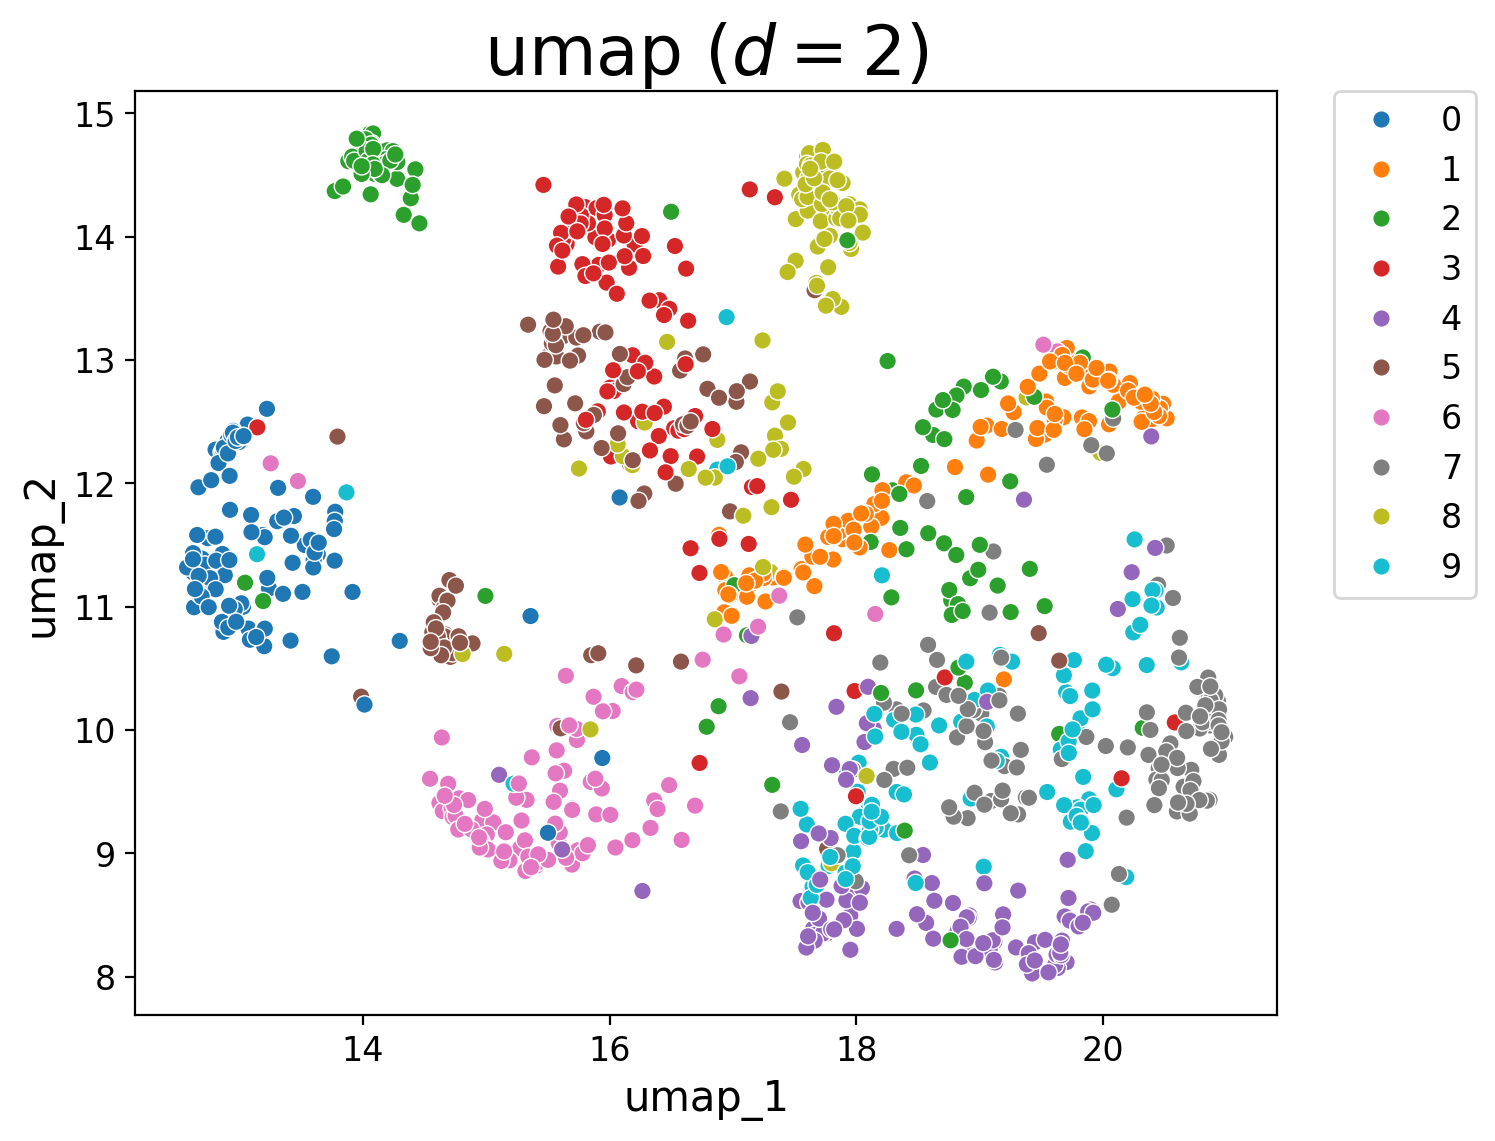

In [24]:
### make a scatterplot of the 2 UMAP components 
fig, ax = plt.subplots(1)
sns.scatterplot(x='umap_1', y='umap_2', hue='label', data=df_umap, ax=ax, palette='tab10', legend='full', s=40)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);
ax.set_title(f"umap ($d={n_components}$)", fontsize=25);

Do a similar sweep with different values of `n_neighbors`. Try different distance metrics other than "Euclidean". Which metric works best?

<a name='section_5'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">5. Autoencoder</h2>

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Use torchvision to load the full MNIST dataset as tensors
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)

### Define your simple autoencoder with latent dimension = 2 
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        ### encoder goes here
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            # ???
            nn.Linear(64, 2)     ### latent dim = 2
        )

        ### decoder goes here
        self.decoder = nn.Sequential(
            nn.Linear(64,2),
            nn.ReLU(),
            # ???
            nn.Sigmoid(),        ### scale pixel values to [0,1]
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z

### train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoder().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0e-3)

n_epochs = 5
for epoch in range(n_epochs):
    running_loss = 0.0
    for imgs, _ in train_loader:
        imgs = imgs.to(device)
        optimizer.zero_grad()
        x_hat, z = model(imgs)
        loss = criterion(x_hat, imgs.view(imgs.size(0), -1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}")

### evaluate 
model.eval()
latents, labels = [], []
with torch.no_grad():
    for imgs, lbls in test_loader:
        imgs = imgs.to(device)
        _, z = model(imgs)
        latents.append(z.cpu())
        labels.append(lbls)
latents = torch.cat(latents)
labels = torch.cat(labels)

print("Latent space shape:", latents.shape)  # (N_test, 2)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x128 and 64x2)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
scatter = plt.scatter(latents[:,0], latents[:,1], c=labels, cmap="tab10", s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label="Digit")
plt.xlabel("Latent dimension 1")
plt.ylabel("Latent dimension 2")
plt.title("2D Autoencoder Embedding of MNIST")
plt.show()

### Further exercises:


- Try running t-SNE, UMAP, and your autoencoder after first running PCA. Did the performance change?
- Convert all of these 2D plots into 3D plots, and update the dimensionality-reduction strategies accordingly.
- How many PCA components are needed to explain 90% of the variance?
- Try using a different dataset of your choice! (Having class labels already is helpful.)